In [151]:
%matplotlib inline
import pandas as pd
import numpy as np
import wikipedia as wiki
import matplotlib.pyplot as plt

In [2]:
datadir = '/Users/klarnemann/Documents/Insight/Insight_project/data'
fhp_df_f = '%s/federal_historic_places.xlsx' % (datadir)
fhp_df = pd.read_excel(fhp_df_f, index_col=0)
fhp_df['Article_content'] = ''
fhp_df.head()

,Ref#,Prefix,Property Name,Status,Request Type,Status Date,Restricted Address,City,County,Federal Agencies,...,Smithsonian Institution,Soil Conservation Service,Space Administration,State Department,Tennessee Valley Authority,U.S. Department Of Agriculture,U.S. Department Of The Interior,U.S. Postal Service,Veterans Administration,Article_content
0,87002178,NaN,Building 800--Austin Hall,Listed,Single,1988-03-02,False,Montgomery,Montgomery,AIR FORCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,87002182,NaN,Building 836--Community College of the Air For...,Listed,Single,1988-03-02,False,Montgomery,Montgomery,AIR FORCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,87002177,NaN,Maxwell Air Force Base Senior Officer's Quarte...,Listed,Single,1988-03-02,False,Montgomery,Montgomery,AIR FORCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,90000933,NaN,Midvale Archeological Site,Listed,Single,1990-06-14,True,Chandler,Maricopa,AIR FORCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,95000748,NaN,Ammo Bunker (S-1007),Listed,Multiple,1995-06-19,False,Mesa,Maricopa,AIR FORCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [120]:
fhp_df.shape

(6385, 61)

In [3]:
content = []
for i, title in enumerate(fhp_df['Property Name'].values):
    try:
        tmp = wiki.page(title).content
        content.append(tmp)
    except:
        content.append('')
    if i % 100 == 0:
        print(i)

0


/Users/klarnemann/anaconda3/lib/python3.7/site-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/klarnemann/anaconda3/lib/python3.7/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300


In [4]:
fhp_df['Article_content'] = content
fhp_df.to_excel(fhp_df_f)

In [5]:
fhp_df.head()

,Ref#,Prefix,Property Name,Status,Request Type,Status Date,Restricted Address,City,County,Federal Agencies,...,Smithsonian Institution,Soil Conservation Service,Space Administration,State Department,Tennessee Valley Authority,U.S. Department Of Agriculture,U.S. Department Of The Interior,U.S. Postal Service,Veterans Administration,Article_content
0,87002178,NaN,Building 800--Austin Hall,Listed,Single,1988-03-02,False,Montgomery,Montgomery,AIR FORCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Building 800–Austin Hall is located in Montgom...
1,87002182,NaN,Building 836--Community College of the Air For...,Listed,Single,1988-03-02,False,Montgomery,Montgomery,AIR FORCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Simler Hall (also known as Building 836) is th...
2,87002177,NaN,Maxwell Air Force Base Senior Officer's Quarte...,Listed,Single,1988-03-02,False,Montgomery,Montgomery,AIR FORCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Maxwell Air Force Base Senior Officer's Qu...
3,90000933,NaN,Midvale Archeological Site,Listed,Single,1990-06-14,True,Chandler,Maricopa,AIR FORCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This is a list of the National Register of His...
4,95000748,NaN,Ammo Bunker (S-1007),Listed,Multiple,1995-06-19,False,Mesa,Maricopa,AIR FORCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Williams Air Force Base is a former United Sta...


In [52]:
fhp_df = fhp_df.rename(columns={'National Aeronautics &Amp': 'NASA'})
fhp_df = fhp_df.drop('Space Administration', axis=1)

In [75]:
def get_col_items(col):
    return fhp_df[['Property Name', 'Article_content']][fhp_df[col]==1]

In [103]:
keyword_dict = \
{'site' : 'Anthropology/Archaeology', 
'bunker' : 'Military', 
'hanger' : 'Military', 
'ammo' : 'Military',
'estate' : 'Historic site'
'archeological' : 'Anthropology/Archaeology', 
'air force station' : 'Military'
'laboratory' : 'Science'
'fort' : 'Military', 
'historic district' : 'Historic district', 
'post office' : 'Historic site',
'lighthouse' : 'Historic site', 
'dam' : 'Industry',
'cabin' : 'Historic site', 
'house' : 'Historic site',
'lodge' : 'Historic site'
'base' : 'Military',
'petroglyphs' : 'Anthropology/Archaeology',
'barracks' : 'Military',
'reservoir' : 'Nature', 
'cemetery' : 'Cemetery'
'hospital' : 'Public service'}

In [ ]:
['Air Force'], ['Military']
['Army Corps Of Engineers'], ['Technology', 'Industry']
['Bureau Of Indian Affairs'], ['Heritage', 'Anthropology/Archaeology']
['Bureau Of Land Management'], ['Nature', 'Anthropology/Archaeology']
['Bureau Of Mines'], ['Industry']
['Bureau Of Reclamation'], ['Industry', 'Technology', "Anthropology/Archaeology"]
['Coast Guard'], ['Industry', 'Transportation']
['Department Of Agriculture'], ['Agriculture', 'Anthropology/Archaeology', 'Nature']
['Department Of Commerce'], ['Military']
['Department Of Defense'], ['Military', 'History']
['Department Of Energy'], ['Industry', 'Anthropology/Archaeology']
['Department Of Justice'], ['Government']
['Department Of Labor'], ['Public service']
['Department Of The Army'], ['Military']
['Department Of The Interior'], ['Military', 'History', 'Transportation']
['Department Of The Navy'], ['Military', 'Transportation', 'History']
['Department Of The Treasury'], ['Business']
['Department Of Transportation'], ['Transportation']
['Economic Development Administration'], ['Anthropology/Archaeology']
['Farmers Home Administration'], ['Anthropology/Archaeology', 'History']
['Federal Aviation Administration'], ['Transportation']
['Federal Communications Commission'], ['Technology']
['Federal Deposit Insurance Commission'], ['']
['Federal Highway Administration'], ['Industry']
['Fish And Wildlife Service'], ['Anthropology/Archaeology', 'Industry', 'Agriculture']
['Forest Service'], ['Nature', 'History', 'Anthropology/Archaeology']
['General Services Administration'], ['Military', 'Public service', 'Government', 'History']
['Geological Survey'], ['']
['Health And Human Services Department'], ['Public service','History']
['Housing And Urban Development Department'], ['Public service', 'History']
['International Boundary And Water Commission'], ['']
['Marine Corps'], ['Military']
['NASA'], ['Science', 'Transportation', 'Technology']
['National Park Service'], ['Nature', 'History', 'Anthropology/Archaeology']
['National Science Foundation'], ['Science']
['Nuclear Regulatory Commission'], ['Technology', 'Science']
['Postal Service'], ['History', 'Public service']
['Small Business Administration'], ['Industry']
['Smithsonian Institution'], ['History', 'Art']
['Soil Conservation Service'], ['Anthropology/Archaeology']
['State Department'], ['Government']
['Tennessee Valley Authority'], ['Industry', 'Technology']
['U.S. Department Of Agriculture'], ['Industry', 'Anthropology/Archaeology', 'Heritage', 'Nature', 'Public Service']
['U.S. Department Of The Interior'], ['Military']
['U.S. Postal Service'], ['Public service', 'History']
['Veterans Administration'], ['Military', 'Public Service']

In [36]:
locations = []
for i in fhp_df.index:
    try:
        city = df.loc[i, 'City ']
        city = city.title().strip()
        state = df.loc[i, 'State']
        state = state.title().strip()
        location = '%s, %s' % (city, state)
        locations.append(location)
    except:
        locations.append('')

In [39]:
fhp_df.insert(3, 'Location', locations)

In [119]:
fhp_df.to_excel(fhp_df_f)

In [40]:
df = fhp_df[['Property Name', 'Location', 'Article_content']]
df.head()

,Property Name,Location,Article_content
0,Building 800--Austin Hall,"Montgomery, Alabama",Building 800–Austin Hall is located in Montgom...
1,Building 836--Community College of the Air For...,"Montgomery, Alabama",Simler Hall (also known as Building 836) is th...
2,Maxwell Air Force Base Senior Officer's Quarte...,"Montgomery, Alabama",The Maxwell Air Force Base Senior Officer's Qu...
3,Midvale Archeological Site,"Chandler, Arizona",This is a list of the National Register of His...
4,Ammo Bunker (S-1007),"Mesa, Arizona",Williams Air Force Base is a former United Sta...


In [11]:
fhp_df.Article_content[fhp_df.Article_content != ''].shape

(5516,)

In [12]:
fhp_df.shape

(6385, 61)

In [13]:
5516. / 6385

0.8638997650743931

In [135]:
fhp_count_by_city = fhp_count_by_city.drop('')

In [144]:
fhp_count_by_city.shape
n_cities = 3264
print(n_cities/9983.)

0.326955824902334


In [147]:
figdir = '/Users/klarnemann/Documents/Insight/Insight_project/docs/figures'

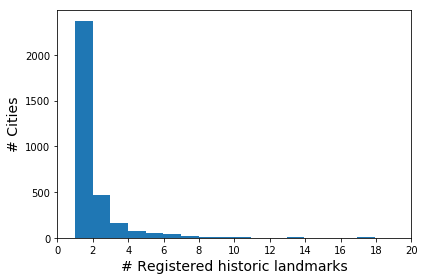

In [153]:
plt.figure(figsize=(6,4));
plt.hist(fhp_count_by_city, bins=303);
plt.xlim(0,20);
plt.xlabel('# Registered historic landmarks', fontsize=14);
plt.xticks(np.linspace(0,20,11), np.linspace(0,20,11, dtype=int))
plt.ylabel('# Cities', fontsize=14);
plt.tight_layout()
plt.savefig('%s/hist_n_historic_landmarks_in_cities.png' % (figdir), dpi=150, transparent=True)

In [115]:
fhp_count_by_city = fhp_df.groupby('Location')['Property Name'].count()

In [118]:
fhp_count_by_city.to_excel('Federal_history_place_count_by_city.xlsx')

In [ ]:
                 bgbgggbyyybdffyfddy yfdfdydd fddydyyyyyyyyydydyyyyyydy fdfdfdffdfdddfdfdfdffdffffffffffffffffffffffffffffffffffffdffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffdddffdfffdfffffffffffffffffffffdyffffffffdfydfyfyyfyyffyfffyfyyfyffyyyyyfyffyyyyyyffyyfyyyyyyyyfyffyyfyyfyfyffyyydyyydyfdffffdfyfffyj/g/jj/jjjjj/j///////j/jygg                   gygg                                                                                                                                                                                                  g                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       gfdgfdddfx                                             xf   f ffgggg             xxgg                                                                       g               g          gxxgggxgggxgxggxxxgxxxgf                                                                                    fxgddfxg zgxgxgxdff   fdfdf fddfddf  f      ddddddddddddd